# Load processed data

In [2]:
files = {}
files['0'] = '59_madore_3.23'
files['1'] = '76_IRSB_IJ_HK_3.23'
files['2'] = '20_cluster_cruz_3.23'
files['3'] = '29_LMC_3.4'
files['4'] = '32_SMC_VIJK_2.53'
#files['5'] = '103_raw_data_IRSB_3.23'
import pandas as pd
d = ['h', 'j', 'c', 'l', 's', 'j']
def load(n):
    cepheids, relation = [], []
    for x in range(0,n):
        a = pd.read_csv(f'data/processed/{files[str(x)]}/8_result/{files[str(x)][:2]}_merged_data.csv')
        b = pd.read_csv(f'data/processed/{files[str(x)]}/8_result/{files[str(x)][:2]}_5_result_regression.csv')
        cepheids.append(a)
        relation.append(b)
        print(d[x],files[str(x)])
    return cepheids, relation

stars,pl=load(len(files))

h 59_madore_3.23
j 76_IRSB_IJ_HK_3.23
c 20_cluster_cruz_3.23
l 29_LMC_3.4
s 32_SMC_VIJK_2.53


# Fouque vs mine Wesenheit

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from data.datamapping import mag, colors, R_ratio
data = pd.read_csv('data/processed/59_madore_3.23/1_prepared/59_wes_data.csv')
fou = pd.read_csv('data/input/table7.csv')
plt.figure(figsize=(12, 4))
for m in mag:
    plt.plot(data['logP'],data[f'{m}BI_h']-fou['Wbi'],'.',label = f'$\Delta W_{m},BI$')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title(f'Wesenhiet Deviation $W_\lambda$,BI (Shubham) - WB,BI (Fouque)')
plt.xlabel('Period (logP)')
plt.legend()
plt.show()
plt.figure(figsize=(12, 4))
for m in mag:
    plt.plot(data['logP'],data[f'{m}VI_h']-fou['Wvi'], '.',label = f'$\Delta W_{m},VI$')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title(f'Wesenhiet Deviation $W_\lambda$, VI (Shubham) - WB,VI (Fouque)')
#plt.ylim(-0.02,0.02)
plt.legend()
plt.show()

# Deviation between Fouque and Shubham weseheits
plt.figure(figsize=(12, 4))
dev_bi = data[f'BBI_h']-fou['Wbi']
dev_vi = data[f'VVI_h']-fou['Wvi']
plt.plot(data['logP'],dev_vi, 'b.',label = f'$\Delta W_V,VI | \sigma = {dev_vi.std() :.3f}$')
plt.plot(data['logP'],dev_bi, 'y.', label = f'$\Delta W_B,BI | \sigma = {dev_bi.std() :.3f}$')
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend()
plt.title('Deviation in V,VI and B,BI wesenheit (Shubham - Fouque)')
plt.ylabel(f'W,S - W,F')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/processed/59_madore_3.23/1_prepared/59_wes_data.csv'

# Madore vs Shubham calibrated $\mu - E_{BV}$ deviation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
madore = pd.read_csv('data/input/59_madore.csv')
madore_corr = pd.read_csv('data/processed/59_madore_3.23/8_result/59_corrected.csv')
wes_show=['BJ', 'BH', 'BK', 'VI', 'VJ', 'VH', 'VK', 'RJ', 'RH']
plt.figure(figsize=(12, 4))
for col in wes_show:
    diff = madore_corr[f'EBVS0{col}_h'] - madore['excessu'] 
    plt.plot(madore['logP'], diff, '.', label = f'{col} $\sigma$= {diff.std() :.3f}')
plt.plot(madore['logP'], madore_corr[f'EBVS0VI_h'] - madore['excessu'], 'ko', label = f'VI $\sigma$= {diff.std() :.3f}')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Deviation in calibrated $E_{BV}$ (Shubham - Madore)')
#plt.ylim(-0.2,0.2)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
plt.figure(figsize=(12, 4))
for col in wes_show:
    diff = madore_corr[f'muS0{col}_h'] - madore['modu'] 
    plt.plot(madore['logP'], diff, '.', label = f'{col} $\sigma$ = {diff.std() :.3f}')
plt.plot(madore['logP'], madore_corr[f'muS0VI_h'] - madore['modu'], 'ko', label = f'VI $\sigma$= {diff.std() :.3f}')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Deviation in calibrated modulus')
#plt.ylim(-0.2,0.2)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#    plt.plot(madore['logP'], madore['excessu'] - madore_corr['EBVS0{col}_h'])

KeyError: 'EBVS0BJ_h'

<Figure size 1200x400 with 0 Axes>

# Jesper Madore common cepheid

In [5]:
from lvtlaw.a_utils import merge_12
madore = pd.read_csv('data/input/59_madore.csv')
name1=[]
name2=[]
for i in range(len(stars[0])):
    for j in range(len(stars[1])):
        if stars[0].logP[i] == stars[1].logP[j]:
            #print(stars[1].name[j])
            name1.append(j)
            name2.append(i)

jes = stars[1].iloc[name1]
mad = stars[0].iloc[name2]

m = merge_12(mad,jes, on=['logP'])
#m.style#len(m)

* * a_utils module loaded!


In [6]:
import matplotlib.pyplot as plt
wes_show=['BJ', 'BH', 'BK','VJ', 'IH', 'IK', 'HK']
#    plt.plot(m['logP'], m[f'M_{band}0_p'] - m[f'M_{band}0_g'], 'ko', label = 'cruz - jesper')
#    plt.plot(m['logP'], m[f'EBVS0{col}_p'] - m[f'EBVS0{col}_g'], 'ko', label = 'cruz - jesper')
#dv = mad[f'EBV'] - jes[f'EBV']
for cols in wes_show:
    dv = m[f'excessu'] - m[f'EBVS0{cols}_g']
    plt.plot(m['logP'], dv, '.', label = f'{cols} s = {dv.std():.3f}')
plt.plot(m['logP'], dv, '.', label = f'{cols} s = {dv.std():.3f}')
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend()
plt.title(f'EBV Deviation raw cruz - calibrated jesper')
plt.xlabel(f'Period (logP)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
for col in wes_show:
    dv = m[f'modu'] - m[f'muS0{col}_g']
    plt.plot(m['logP'], dv, '.', label = f'{col} s = {dv.std():.3f}')
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend()
plt.title(f'mu Deviation raw jesper - calibrated jesper')
plt.xlabel(f'Period (logP)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

KeyError: 'excessu'

# Jesper-Cruz Common Cepheids

In [3]:
jname=[]
cname=[]
for i in range(20):
    for j in range(len(stars[1])):
        if stars[2].logP[i] == stars[1].logP[j]:
            print(stars[2].name[i], stars[1].name[j])
            jname.append(j)
            cname.append(i)

jes = stars[1].iloc[jname]
cru = stars[2].iloc[cname]

from lvtlaw.a_utils import merge_12
m = merge_12(cru,jes, on=['logP'])
#jes.style
jes['muS0HK_j'].values - cru['mplx'].values
#m = m[2:-1]
names = stars[2]['name'].iloc[cname].values
#names = names[2:-1]
dv = pd.DataFrame()
dv['diffr'] = m[f'EBV'] - m[f'rdS0HK_j']
dv['diffm'] = m[f'mplx'] - m[f'muS0HK_j']
dv['name'] = m['name']
dv
df = dv[dv["diffm"] > 0.2]
dv['diffm'].std()
print(len(dv),len(df))

QZ Nor QZ Nor
ST Tau ST Tau
CF Cas CF Cas
V Lac VL ac
CV Mon CV Mon
X Lac XL ac
V Cen VC en
CS Vel CS Vel
U Sgr US gr
RS Ori RS Ori
GH Lup GH Lup
S Nor SN or
Y Sct YS ct
X Pup XP up
* * datamapping module loaded!
* * a_utils module loaded!
14 4


# Cruz vs Jesper $\mu - E_{BV}$ correction 

./docs/reports/plots/9_compare/jesper_cruz_rd.pdf


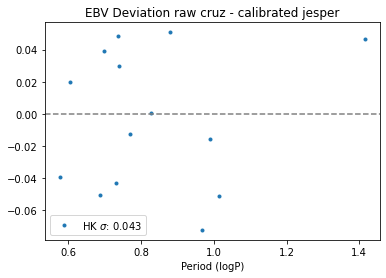

./docs/reports/plots/9_compare/jesper_cruz_mu.pdf


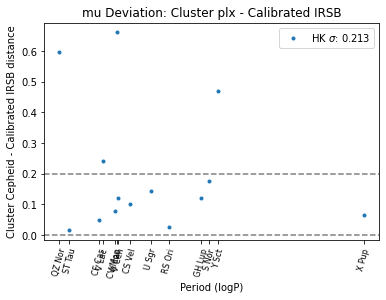

In [4]:
import matplotlib.pyplot as plt
wes_show=['HK']
dis = '_j'
#dv = m[f'EBV'] - jes[f'EBV']
from lvtlaw.a_utils import data_dir, data_out,imgsave

for cols in wes_show:
    dv = m[f'EBV'] - m[f'rdS0{cols}{dis}']
    plt.plot(m['logP'], dv, '.', label = f'{cols} $\sigma$: {dv.std():.3f}')
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend()
plt.title(f'EBV Deviation raw cruz - calibrated jesper')
plt.xlabel(f'Period (logP)')
plt.legend()
imgsave('jesper_cruz_rd',step=8,img_path='./docs/reports/plots/')
plt.show()
for col in wes_show:
    dv = m[f'mplx'] - m[f'muS0{col}{dis}']
    plt.plot(m['logP'], dv, '.', label = f'{col} $\sigma$: {dv.std():.3f}')
plt.axhline(y=0, color='gray', linestyle='--')
plt.axhline(y=0.2, color='gray', linestyle='--')
plt.legend()
plt.title(f'mu Deviation: Cluster plx - Calibrated IRSB')
plt.xlabel(f'Period (logP)')
plt.ylabel(f'Cluster Cepheid - Calibrated IRSB distance')
plt.xticks(ticks=m['logP'], labels=names, rotation=75,fontsize=8 )
plt.legend()
imgsave('jesper_cruz_mu',step=8,img_path='./docs/reports/plots/')
plt.show()

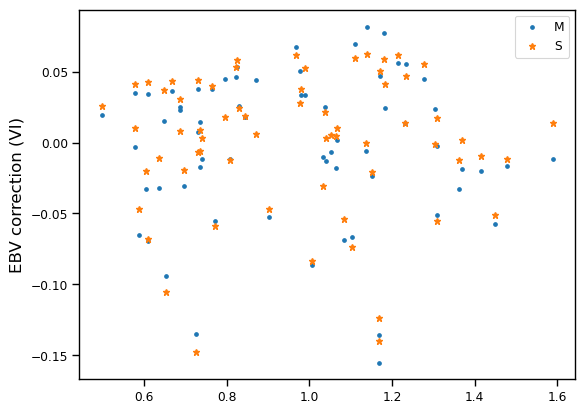

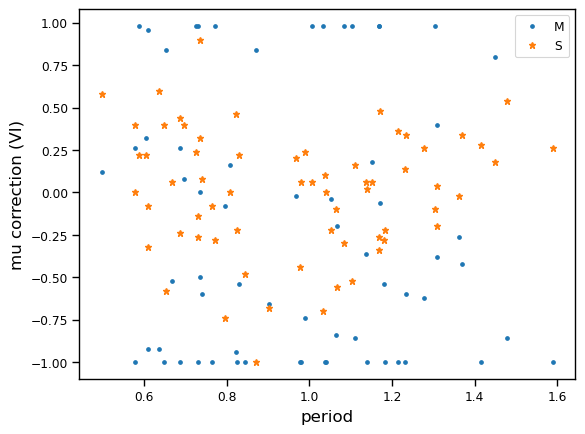

In [ ]:
import matplotlib.pyplot as plt
plt.plot(rd_mu_rms.logP, rd_mu_rms.rdM0VI_j, '.', label = 'M')
plt.plot(rd_mu_rms.logP, rd_mu_rms.rdS0VI_j, '*', label = 'S')
plt.ylabel('EBV correction (VI)')
plt.legend()
plt.show()
plt.plot(rd_mu_rms.logP, rd_mu_rms.muM0VI_j, '.', label = 'M')
plt.plot(rd_mu_rms.logP, rd_mu_rms.muS0VI_j, '*', label = 'S')
plt.ylabel('mu correction (VI)')
plt.xlabel('period')
plt.legend()
plt.show()
#rd_mu_rms.style

In [44]:
m.head().style

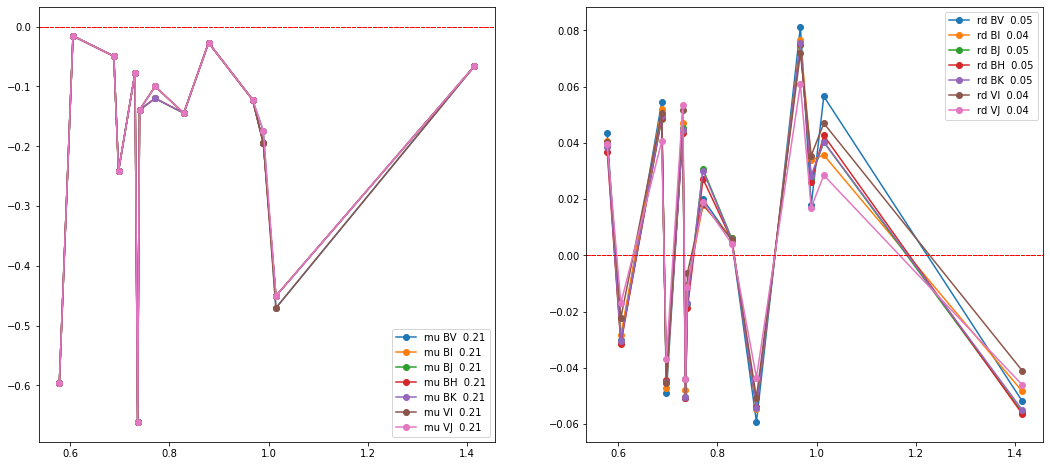

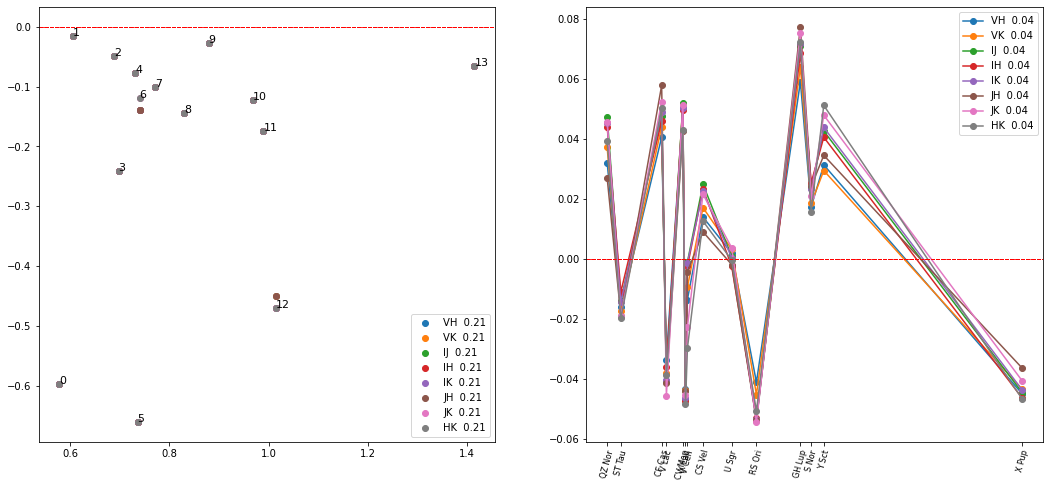

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharex='col')
axs = axs.flatten()  # Flatten for easy indexing
from data.datamapping import *
for col in wes_show[0:7]:
    dmu = m[f'muS0{col}_j'] - m.mplx
    dst = dmu.std()
    axs[0].plot(m.logP, dmu, 'o-', label = f'mu {col} {dst : .2f}')
    de = m[f'rdS0{col}_j'] - m.EBV
    dest = de.std()
    x=m.logP
    axs[1].plot(x, de, '-o', label = f'rd {col} {dest : .2f}')
    axs[0].axhline(0, color='red', linestyle='--', linewidth=1)
    axs[1].axhline(0, color='red', linestyle='--', linewidth=1)
    #for k in range(len(m)):
        #axs[0].annotate('%i'%(k), xy =(x.iloc[k], dmu.iloc[k]), fontsize = 11) 
axs[0].legend()
#plt.xticks(ticks=m['logP'], labels=names, rotation=75,fontsize=8 )
plt.legend()
plt.show()
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharex='col')
axs = axs.flatten()  # Flatten for easy indexing

for col in wes_show[7:]:
    dmu = m[f'muS0{col}_j'] - m.mplx
    dst = dmu.std()
    axs[0].plot(m.logP, dmu, 'o', label = f'{col} {dst : .2f}')
    de = m[f'rdS0{col}_j'] - m.EBV
    dest = de.std()
    x=m.logP
    axs[1].plot(x, de, '-o', label = f'{col} {dest : .2f}')
    axs[0].axhline(0, color='red', linestyle='--', linewidth=1)
    axs[1].axhline(0, color='red', linestyle='--', linewidth=1)
for k in range(len(m)):
    axs[0].annotate('%i'%(k), xy =(x.iloc[k], dmu.iloc[k]), fontsize = 11) 
axs[0].legend()
plt.xticks(ticks=m['logP'], labels=names, rotation=75,fontsize=8 )
axs[1].legend()

# Cruz Jesper Leavitt Law

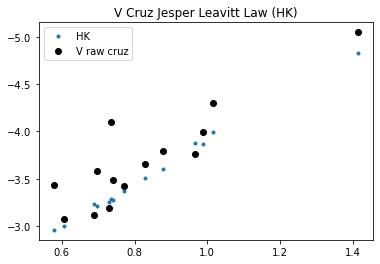

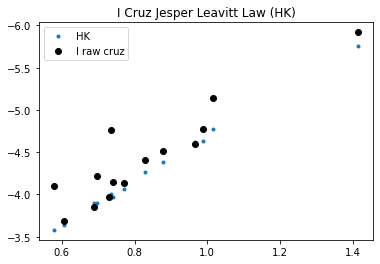

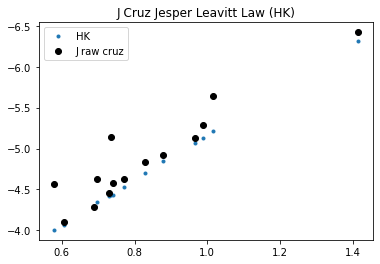

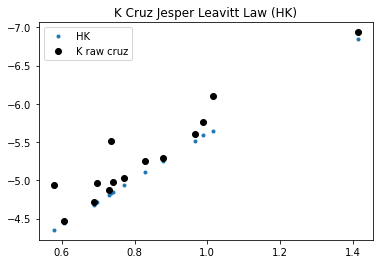

In [28]:
for band in ['V', 'I', 'J', 'K']:
    for col in wes_show:
#        plt.plot(m['logP'], m[f'{band}S0{col}_p'], '*')
        plt.plot(m['logP'], m[f'{band}S0{col}{dis}'], '.',label = col)
    plt.plot(m['logP'], m[f'M_{band}0_c'], 'ko', label = f'{band} raw cruz') 
    #plt.plot(m['logP'], m[f'M_{band}0_p'] - m[f'M_{band}0_g'], 'ko', label = 'cruz - jesper')
    #plt.axhline(y=0, color='gray', linestyle='--')
    plt.legend()
    plt.title(f'{band} Cruz Jesper Leavitt Law ({col})')
    plt.gca().invert_yaxis()
    plt.show()

# Calibrated Leavitt Law

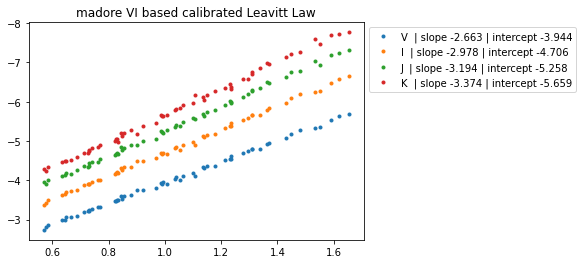

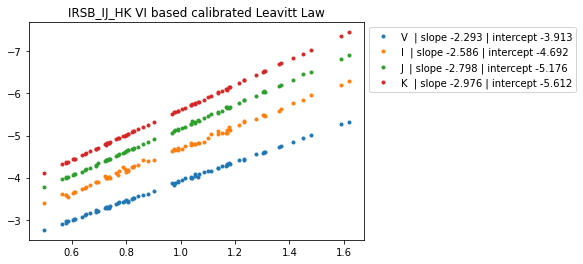

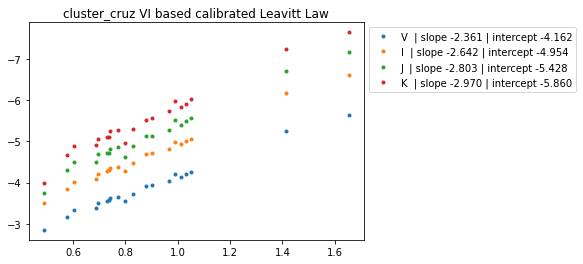

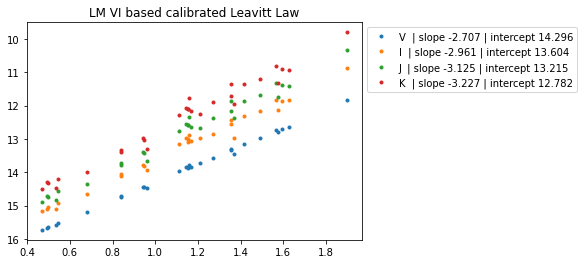

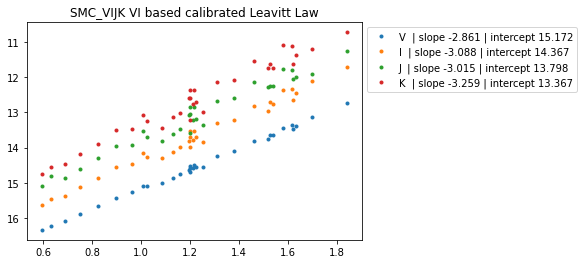

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from data.datamapping import wes_show, mag
col = 'VI'
for n in [0,1,2,3,4]:
    for m in ['V', 'I', 'J', 'K']:
        s = pl[n][f'{m}0{col}S'].iloc[0]
        i = pl[n][f'{m}0{col}S'].iloc[1]
        plt.plot(stars[n]['logP'],stars[n][f'{m}S0{col}_{d[n]}'], '.', label = f'{m}  | slope {s:.3f} | intercept {i:.3f}')
    plt.gca().invert_yaxis()
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title(f'{files[str(n)][3:-5]} {col} based calibrated Leavitt Law')
    plt.show()

* * datamapping module loaded!


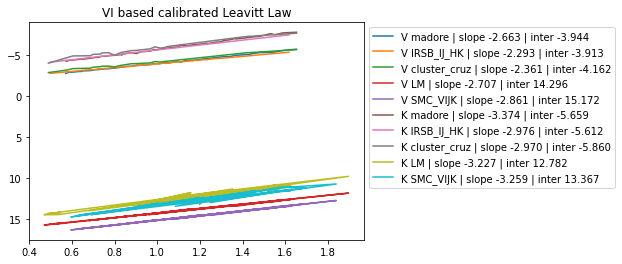

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from data.datamapping import wes_show, mag
col = 'VI'
for m in ['V', 'K']:
    for n in range(5):
        s = pl[n][f'{m}0{col}S'].iloc[0]
        i = pl[n][f'{m}0{col}S'].iloc[1]
        se = pl[n][f'{m}0{col}S'].iloc[2]
        ie = pl[n][f'{m}0{col}S'].iloc[3]
        plt.plot(stars[n]['logP'],stars[n][f'{m}S0{col}_{d[n]}'], '-', label = f'{m} {files[str(n)][3:-5]} | slope {s:.3f} | inter {i:.3f}')
plt.gca().invert_yaxis()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title(f'{col} based calibrated Leavitt Law')
plt.show()

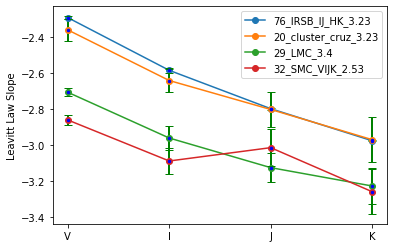

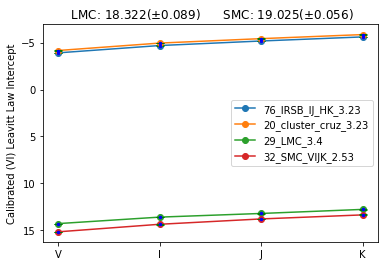

In [6]:
f='S'
r=pl
c=stars
t = 1
col='VI'
mag=['V', 'I','J', 'K'] 
lmc =  r[3][[f'{m}0{col}{f}' for m in mag]].iloc[1] - r[t][[f'{m}0{col}{f}' for m in mag]].iloc[1]
smc =  r[4][[f'{m}0{col}{f}' for m in mag]].iloc[1] - r[t][[f'{m}0{col}{f}' for m in mag]].iloc[1]
for i in range(1,5):
    sl = r[i][[f'{m}0{col}{f}' for m in mag]].iloc[0]
    err = r[i][[f'{m}0{col}{f}' for m in mag]].iloc[2]
    plt.plot([x for x in range(len(mag))], sl, '-o', label=files[str(i)])
    plt.errorbar([x for x in range(len(mag))], sl, yerr=err, fmt='.', markersize=5, color='blue', ecolor='green', elinewidth=2, capsize=4)
# V band with error bars
plt.xticks(ticks=range(len(mag)), labels=mag)  # Set x-axis ticks to values in mag
plt.legend()
#plt.title(f'LMC: {lmc.mean():.3f}($\pm${lmc.std():.3f})      SMC: {smc.mean():.3f}($\pm${smc.std():.3f})')
plt.ylabel(f'Leavitt Law Slope')
plt.show()

for i in range(1,5):
    int = r[i][[f'{m}0{col}{f}' for m in mag]].iloc[1]
    err = r[i][[f'{m}0{col}{f}' for m in mag]].iloc[3]
    plt.plot([x for x in range(len(mag))], int, '-o', label = files[str(i)])
    plt.errorbar([x for x in range(len(mag))], int, yerr=err, fmt='.', markersize=5, color='blue', ecolor='green', elinewidth=2, capsize=4)
plt.legend()
plt.xticks(ticks=range(len(mag)), labels=mag)  # Set x-axis ticks to values in mag
plt.title(f' LMC: {lmc.mean():.3f}($\pm${lmc.std():.3f})      SMC: {smc.mean():.3f}($\pm${smc.std():.3f})')
plt.ylabel(f'Calibrated ({col}) Leavitt Law Intercept')
plt.gca().invert_yaxis()
#imgsave('LMCSMCmu',step=8,img_path=img_out_path)
plt.show()


# LMC SMC Distance

In [16]:
print(lmc)

V0VIS   -0.225457
I0VIS   -0.153859
J0VIS    0.009342
K0VIS   -0.021867
Name: 1, dtype: float64


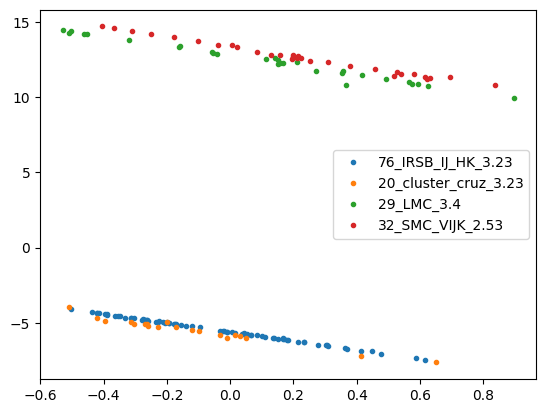

In [34]:
import matplotlib.pyplot as plt
d = ['h', 'j', 'c', 'l', 's']
band = 'K'
for i in range(1,5):
    plt.plot(c[i]['logP']-1, c[i][f'{band}S0VI_{d[i]}'], '.', label = f'{files[str(i)]}')
#plt.plot(riess['logP']-1, riess[f'M_{band}0_g'] , 'o', label = f'18_riess')
plt.legend()
plt.show()


In [35]:
def distance_modulus_to_kpc(mu):
    distance_pc = 10 * 10 ** ((mu / 5))
    distance_kpc = distance_pc / 1000   
    return distance_kpc

# Example usage:
mu = lmc.mean()  # Example distance modulus

distance_kpc = distance_modulus_to_kpc(mu)
print(f"LMC {distance_kpc:.2f} kpc.")
print(mu, mu.std())
mu = smc.mean()  # Example distance modulus
distance_kpc = distance_modulus_to_kpc(mu)
print(f"SMC {distance_kpc:.2f} kpc.")
print(mu, mu.std())

LMC 47.14 kpc.
18.367088321574833 0.0
SMC 65.16 kpc.
19.06987808385598 0.0


In [72]:
lmc = pd.read_csv('data/input/30_LMC.csv')
lmc = lmc.sort_values(by='logP', ascending=True)
lmc = lmc.drop(index = 0).reset_index()
lmc = lmc[['name', 'logP', 'IRSB', 'EBV','V_mag', 'I_mag', 'J_mag', 'K_mag']]
lmc.to_csv('data/input/29_LMC.csv')